# EDA on Enrollment data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## Imported enrollment file 1

In [2]:
enroll_01=pd.read_csv('api_data_aadhar_enrolment_0_500000.csv')
enroll_01.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [3]:
enroll_01.shape

(500000, 7)

In [4]:
enroll_01['state'].unique()
# enroll_01['state'].nunique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA'], dtype=object)

In [5]:
enroll_01['new_date'] = pd.to_datetime(
    enroll_01['date'],
    dayfirst=True,
    errors='coerce'
).dt.strftime('%Y%m%d')
enroll_01

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,20250302
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,20250309
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,20250309
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,20250309
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,20250309
...,...,...,...,...,...,...,...,...
499995,26-10-2025,Andhra Pradesh,Mahbubnagar,509207,1,0,0,20251026
499996,26-10-2025,Andhra Pradesh,Medak,502220,1,0,0,20251026
499997,26-10-2025,Andhra Pradesh,Medak,502256,0,1,0,20251026
499998,26-10-2025,Andhra Pradesh,Medak,502286,1,0,0,20251026


In [6]:
enroll_01['new_date'].isnull().sum()

np.int64(0)

In [7]:
print(enroll_01['new_date'].max())
print(enroll_01['new_date'].min())

20251026
20250302


## Imported enrollment file 2

In [8]:
enroll_02=pd.read_csv('api_data_aadhar_enrolment_500000_1000000.csv')
enroll_02.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0


In [9]:
enroll_02['new_date'] = pd.to_datetime(
    enroll_02['date'],
    dayfirst=True,
    errors='coerce'
).dt.strftime('%Y%m%d')
enroll_02

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0,20251026
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0,20251026
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0,20251026
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0,20251026
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0,20251026
...,...,...,...,...,...,...,...,...
499995,31-12-2025,Telangana,Hyderabad,500045,4,5,1,20251231
499996,31-12-2025,Telangana,Hyderabad,500057,0,2,0,20251231
499997,31-12-2025,Telangana,Hyderabad,500061,4,2,0,20251231
499998,31-12-2025,Telangana,Hyderabad,500062,1,4,0,20251231


In [10]:
enroll_02['new_date'].isnull().sum()

np.int64(0)

In [11]:
print(enroll_02['new_date'].max())
print(enroll_02['new_date'].min())

20251231
20251026


## Imported enrollment file 3

In [12]:
enroll_03=pd.read_csv('api_data_aadhar_enrolment_1000000_1006029.csv')

In [13]:
enroll_03.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [14]:
enroll_03['new_date'] = pd.to_datetime(
    enroll_03['date'],
    dayfirst=True,
    errors='coerce'
).dt.strftime('%Y%m%d')
enroll_03


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date
0,31-12-2025,Karnataka,Bidar,585330,2,3,0,20251231
1,31-12-2025,Karnataka,Bidar,585402,6,0,0,20251231
2,31-12-2025,Karnataka,Bidar,585413,1,0,0,20251231
3,31-12-2025,Karnataka,Bidar,585418,1,2,0,20251231
4,31-12-2025,Karnataka,Bidar,585421,4,3,0,20251231
...,...,...,...,...,...,...,...,...
6024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0,20251231
6025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0,20251231
6026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0,20251231
6027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0,20251231


In [15]:
enroll_03['new_date'].isnull().sum()

np.int64(0)

In [16]:
print(enroll_03['new_date'].max())
print(enroll_03['new_date'].min())

20251231
20251231


### Marging Three Datasets

In [17]:
df = pd.concat([enroll_01, enroll_02, enroll_03], axis=0, ignore_index=True)
df.shape

(1006029, 8)

In [18]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,20250302
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,20250309
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,20250309
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,20250309
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,20250309


In [19]:
df['new_date'].isnull().sum()

np.int64(0)

In [20]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'The Dadra And Nagar Haveli And Daman And Diu',
       'Arunachal Pradesh', 'Himachal Pradesh', 'Goa',
       'Jammu And Kashmir', 'Dadra and Nagar Haveli and Daman and Diu',
       'Ladakh', 'Andaman and Nicobar Islands', 'Orissa', 'Pondicherry',
       'Puducherry', 'Lakshadweep', 'Andaman & Nicobar Islands',
       'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli', 'Daman and Diu',
       'WEST BENGAL', 'Jammu & Kashmir', 'West  Bengal', '100000',
       'Daman & Diu', 'West Bangal', 'Westbengal', 'West bengal',
       'andhra pradesh', 'ODISHA', 'WESTBENGAL'], dtype=object)

In [21]:
import pandas as pd
import re

def clean_state_name(x):
    if pd.isna(x):
        return x
    x = str(x).lower()
    x = re.sub(r'[^a-z\s]', ' ', x)   # remove symbols like &, .
    x = re.sub(r'\s+', ' ', x).strip()  # remove extra spaces
    return x

In [22]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal ': 'West Bengal',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',

    # Collapse all Dadra / Daman variants into ONE state
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',


    # Puducherry
    'puducherry': 'Puducherry',


    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Puducherry
    'pondicherry': 'Puducherry',

    # Case-normalized direct matches
    'delhi': 'Delhi',
    'ladakh': 'Ladakh',
    'goa': 'Goa',
    'sikkim': 'Sikkim',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'punjab': 'Punjab',
    'kerala': 'Kerala',
    'haryana': 'Haryana',
    'gujarat': 'Gujarat',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'karnataka': 'Karnataka',
    'maharashtra': 'Maharashtra',
    'rajasthan': 'Rajasthan',
    'uttar pradesh': 'Uttar Pradesh',
    'madhya pradesh': 'Madhya Pradesh',
    'himachal pradesh': 'Himachal Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'chhattisgarh': 'Chhattisgarh',
    'jharkhand': 'Jharkhand',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'tripura': 'Tripura',
    'uttarakhand': 'Uttarakhand',
    'lakshadweep': 'Lakshadweep',
    'chandigarh': 'Chandigarh'
}


In [23]:
df['state_clean'] = (
    df['state']
    .apply(clean_state_name)
    .map(state_mapping)
)

In [24]:
# Drop invalid entries like numeric junk
df = df[~df['state'].astype(str).str.isnumeric()]

# Optional: check unmapped states
unmapped = df[df['state_clean'].isna()]['state'].unique()
print("Unmapped values:", unmapped)

Unmapped values: []


In [25]:
df['state_clean'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu and Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra and Nagar Haveli and Daman and Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman and Nicobar Islands',
       'Puducherry', 'Lakshadweep'], dtype=object)

In [26]:
df['state_clean'].nunique()

36

In [27]:
df

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37,20250302,Meghalaya
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39,20250309,Karnataka
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,20250309,Uttar Pradesh
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15,20250309,Uttar Pradesh
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21,20250309,Karnataka
...,...,...,...,...,...,...,...,...,...
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0,20251231,West Bengal
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0,20251231,West Bengal
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0,20251231,West Bengal
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0,20251231,West Bengal


In [28]:
df.dtypes

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
new_date          object
state_clean       object
dtype: object

In [29]:
df_maharashtra = df[df['state_clean'] == 'Maharashtra'].copy()
df_maharashtra

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean
12,09-03-2025,Maharashtra,Aurangabad,431001,42,46,12,20250309,Maharashtra
43,15-03-2025,Maharashtra,Parbhani,431401,17,14,37,20250315,Maharashtra
67,20-03-2025,Maharashtra,Thane,421503,19,13,15,20250320,Maharashtra
78,20-03-2025,Maharashtra,Aurangabad,431001,134,38,18,20250320,Maharashtra
151,27-03-2025,Maharashtra,Aurangabad,431001,20,19,16,20250327,Maharashtra
...,...,...,...,...,...,...,...,...,...
1004434,31-12-2025,Maharashtra,Yavatmal,445105,2,1,0,20251231,Maharashtra
1004435,31-12-2025,Maharashtra,Yavatmal,445109,6,1,0,20251231,Maharashtra
1004436,31-12-2025,Maharashtra,Yavatmal,445205,4,2,0,20251231,Maharashtra
1004437,31-12-2025,Maharashtra,Yavatmal,445211,1,0,0,20251231,Maharashtra


In [30]:
df_maharashtra['district'].nunique()

53

In [31]:
df_maharashtra['district'].unique()

array(['Aurangabad', 'Parbhani', 'Thane', 'Nanded', 'Nagpur', 'Jalgaon',
       'Hingoli', 'Ahmadnagar', 'Palghar', 'Satara', 'Raigad',
       'Mumbai Suburban', 'Nandurbar', 'Beed', 'Chandrapur', 'Solapur',
       'Pune', 'Latur', 'Nashik', 'Yavatmal', 'Dhule', 'Washim', 'Sangli',
       'Buldhana', 'Amravati', 'Ahmednagar', 'Mumbai', 'Akola',
       'Osmanabad', 'Ahmed Nagar', 'Bhandara', 'Buldana',
       'Chhatrapati Sambhajinagar', 'Gadchiroli', 'Gondiya', 'Jalna',
       'Kolhapur', 'Mumbai City', 'Raigarh', 'Ratnagiri', 'Sindhudurg',
       'Wardha', 'Chatrapati Sambhaji Nagar', 'Mumbai( Sub Urban )',
       'Nandurbar *', 'Bid', 'Gondiya *', 'Dharashiv', 'Gondia',
       'Washim *', 'Raigarh(MH)', 'Hingoli *', 'Ahilyanagar'],
      dtype=object)

In [32]:
import re
import pandas as pd

def clean_name(x):
    if pd.isna(x):
        return x
    x = str(x).lower()
    x = re.sub(r'[^a-z\s]', ' ', x)   # remove (), ., etc
    x = re.sub(r'\s+', ' ', x).strip()
    return x

In [33]:
district_mapping_maharashtra = {

    # Mumbai
    'mumbai': 'Mumbai',
    'mumbai city': 'Mumbai',
    'mumbai suburban': 'Mumbai Suburban',
    'mumbai sub urban': 'Mumbai Suburban',
    'mumbai sub urban ': 'Mumbai Suburban',

    # Thane Region
    'thane': 'Thane',
    'palghar': 'Palghar',
    'raigad': 'Raigad',
    'raigarh': 'Raigad',
    'raigarh mh': 'Raigad',

    # Pune Division
    'pune': 'Pune',
    'satara': 'Satara',
    'sangli': 'Sangli',
    'solapur': 'Solapur',
    'kolhapur': 'Kolhapur',

    # Nashik Division
    'nashik': 'Nashik',
    'ahmadnagar': 'Ahmednagar',
    'ahmednagar': 'Ahmednagar',
    'ahmed nagar': 'Ahmednagar',
    'ahilyanagar': 'Ahmednagar',
    'dhule': 'Dhule',
    'jalgaon': 'Jalgaon',
    'nandurbar': 'Nandurbar',
    'nandurbar *': 'Nandurbar',

    # Aurangabad / Marathwada
    'aurangabad': 'Chhatrapati Sambhajinagar',
    'chhatrapati sambhajinagar': 'Chhatrapati Sambhajinagar',
    'chatrapati sambhaji nagar': 'Chhatrapati Sambhajinagar',

    'jalna': 'Jalna',
    'parbhani': 'Parbhani',
    'hingoli': 'Hingoli',
    'hingoli *': 'Hingoli',
    'nanded': 'Nanded',
    'latur': 'Latur',
    'osmanabad': 'Dharashiv',
    'dharashiv': 'Dharashiv',
    'bid': 'Beed',
    'beed': 'Beed',

    # Vidarbha
    'nagpur': 'Nagpur',
    'amravati': 'Amravati',
    'akola': 'Akola',
    'buldhana': 'Buldhana',
    'buldana': 'Buldhana',
    'washim': 'Washim',
    'washim *': 'Washim',
    'yavatmal': 'Yavatmal',
    'wardha': 'Wardha',
    'chandrapur': 'Chandrapur',
    'gadchiroli': 'Gadchiroli',
    'bhandara': 'Bhandara',
    'gondia': 'Gondia',
    'gondiya': 'Gondia',
    'gondiya *': 'Gondia',

    # Konkan
    'ratnagiri': 'Ratnagiri',
    'sindhudurg': 'Sindhudurg'
}


In [34]:
df_maharashtra['district_clean'] = (
    df_maharashtra['district']
    .apply(clean_name)
    .map(district_mapping_maharashtra)
    .fillna(df_maharashtra['district'])
)



In [35]:
# Remaining unmapped
# df_maharashtra[df_maharashtra['district_clean'].isna()]['district'].unique()
df_maharashtra[df_maharashtra['district_clean'].isna()]['district'].unique()

# Count check
df_maharashtra['district_clean'].nunique()

36

In [36]:
df_maharashtra['district_clean'].unique()

array(['Chhatrapati Sambhajinagar', 'Parbhani', 'Thane', 'Nanded',
       'Nagpur', 'Jalgaon', 'Hingoli', 'Ahmednagar', 'Palghar', 'Satara',
       'Raigad', 'Mumbai Suburban', 'Nandurbar', 'Beed', 'Chandrapur',
       'Solapur', 'Pune', 'Latur', 'Nashik', 'Yavatmal', 'Dhule',
       'Washim', 'Sangli', 'Buldhana', 'Amravati', 'Mumbai', 'Akola',
       'Dharashiv', 'Bhandara', 'Gadchiroli', 'Gondia', 'Jalna',
       'Kolhapur', 'Ratnagiri', 'Sindhudurg', 'Wardha'], dtype=object)

In [37]:
df_maharashtra

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean,district_clean
12,09-03-2025,Maharashtra,Aurangabad,431001,42,46,12,20250309,Maharashtra,Chhatrapati Sambhajinagar
43,15-03-2025,Maharashtra,Parbhani,431401,17,14,37,20250315,Maharashtra,Parbhani
67,20-03-2025,Maharashtra,Thane,421503,19,13,15,20250320,Maharashtra,Thane
78,20-03-2025,Maharashtra,Aurangabad,431001,134,38,18,20250320,Maharashtra,Chhatrapati Sambhajinagar
151,27-03-2025,Maharashtra,Aurangabad,431001,20,19,16,20250327,Maharashtra,Chhatrapati Sambhajinagar
...,...,...,...,...,...,...,...,...,...,...
1004434,31-12-2025,Maharashtra,Yavatmal,445105,2,1,0,20251231,Maharashtra,Yavatmal
1004435,31-12-2025,Maharashtra,Yavatmal,445109,6,1,0,20251231,Maharashtra,Yavatmal
1004436,31-12-2025,Maharashtra,Yavatmal,445205,4,2,0,20251231,Maharashtra,Yavatmal
1004437,31-12-2025,Maharashtra,Yavatmal,445211,1,0,0,20251231,Maharashtra,Yavatmal


In [38]:
df_maharashtra['district_clean'].isnull().sum()

np.int64(0)

In [39]:
df_maharashtra['new_date'].isnull().sum()

np.int64(0)

In [40]:
# unique count pincode 
df_maharashtra['pincode'].nunique()

1580

In [41]:
##  df_maharashtra[['district_clean','pincode']].value_counts().reset_index(name='count')

In [42]:
pincode_check=df_maharashtra.groupby('district_clean')['pincode'].nunique().reset_index(name='unique_pincode_count')

In [43]:
pincode_check

,district_clean,unique_pincode_count
0,Ahmednagar,90
1,Akola,29
2,Amravati,42
3,Beed,28
4,Bhandara,21
5,Buldhana,32
6,Chandrapur,33
7,Chhatrapati Sambhajinagar,44
8,Dharashiv,28
9,Dhule,29


In [44]:
df_maharashtra[df_maharashtra['district_clean']=='Thane']['pincode'].unique()

array([421503, 421004, 401107, 400607, 421306, 400612, 421301, 421302,
       421501, 400601, 400708, 400703, 400604, 400701, 400705, 400706,
       400709, 401203, 401603, 401606, 421305, 421401, 421601, 421602,
       400602, 400608, 400615, 401105, 401206, 401501, 401602, 421005,
       421303, 400606, 400610, 401101, 401106, 401208, 401301, 401504,
       401610, 421001, 421002, 421103, 421605, 400603, 400605, 401209,
       401404, 421201, 421403, 400614, 401201, 401202, 401304, 401403,
       421202, 421204, 421308, 421311, 401506, 401607, 401303, 401605,
       421102, 421402, 401204, 401604, 421003, 401102, 401305, 421101,
       421203, 421502, 401401, 401502, 421505, 401103, 401207, 421603,
       401601, 421312, 401104, 421506, 400710, 401302, 401702, 401402,
       421304, 401503, 401405, 421604, 401703])

In [45]:
pin_district_count = (
    df_maharashtra.groupby('pincode')['district_clean']
      .nunique()
      .reset_index(name='district_count')
)

In [46]:
pin_district_count

,pincode,district_count
0,400001,2
1,400002,1
2,400003,1
3,400004,1
4,400005,1
...,...,...
1575,445307,1
1576,445308,1
1577,445323,1
1578,445401,1


In [47]:
problem_pins = pin_district_count[
    pin_district_count['district_count'] > 1
]


In [48]:
problem_pins

,pincode,district_count
0,400001,2
11,400012,2
22,400024,2
27,400029,2
31,400033,2
...,...,...
1472,444108,2
1474,444110,2
1494,444405,2
1497,444501,2


In [49]:
df_flagged = df_maharashtra.merge(
    problem_pins[['pincode']],
    on='pincode',
    how='inner'
)


In [50]:
df_flagged

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean,district_clean
0,01-04-2025,Maharashtra,Hingoli,431512,243,22,33,20250401,Maharashtra,Hingoli
1,01-04-2025,Maharashtra,Palghar,401209,174,90,16,20250401,Maharashtra,Palghar
2,01-04-2025,Maharashtra,Thane,401107,292,182,10,20250401,Maharashtra,Thane
3,01-04-2025,Maharashtra,Mumbai Suburban,400058,82,13,10,20250401,Maharashtra,Mumbai Suburban
4,01-04-2025,Maharashtra,Thane,400607,84,22,22,20250401,Maharashtra,Thane
...,...,...,...,...,...,...,...,...,...,...
13510,31-12-2025,Maharashtra,Thane,401209,4,5,0,20251231,Maharashtra,Thane
13511,31-12-2025,Maharashtra,Thane,401302,0,1,0,20251231,Maharashtra,Thane
13512,31-12-2025,Maharashtra,Thane,401404,1,0,0,20251231,Maharashtra,Thane
13513,31-12-2025,Maharashtra,Thane,421303,2,0,0,20251231,Maharashtra,Thane


In [51]:
flagged_pincode_dominant=df_flagged.groupby(['district_clean', 'pincode'])[['age_0_5','age_5_17','age_18_greater']].sum().reset_index()
# flagged_pincode_dominant.to_excel('flagged_pincode_dominan.xlsx')


In [52]:
flagged_pincode_dominant['total_enroll']=flagged_pincode_dominant['age_0_5']+flagged_pincode_dominant['age_5_17']+flagged_pincode_dominant['age_18_greater']
flagged_pincode_dominant.sort_values('pincode')

,district_clean,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
71,Mumbai,400001,44,13,6,63
259,Raigad,400001,0,1,0,1
17,Chhatrapati Sambhajinagar,400012,1,0,0,1
72,Mumbai,400012,251,21,9,281
73,Mumbai,400024,36,16,0,52
...,...,...,...,...,...,...
317,Washim,444405,3,1,0,4
16,Buldhana,444501,3,1,0,4
7,Akola,444501,252,23,3,278
8,Akola,444503,9,3,0,12


In [53]:
idx = flagged_pincode_dominant.groupby('pincode')['total_enroll'].idxmax()
df_filtered = flagged_pincode_dominant.loc[idx]
df_filtered


,district_clean,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
71,Mumbai,400001,44,13,6,63
72,Mumbai,400012,251,21,9,281
148,Mumbai Suburban,400024,51,14,2,67
74,Mumbai,400029,39,9,0,48
75,Mumbai,400033,129,28,2,159
...,...,...,...,...,...,...
4,Akola,444108,177,32,1,210
316,Washim,444110,80,5,4,89
6,Akola,444405,56,2,0,58
7,Akola,444501,252,23,3,278


In [54]:
df_maharashtra['pin_multi_district_flag'] = (
    df_maharashtra.groupby('pincode')['district']
      .transform('nunique') > 1
)


In [55]:
pin_district_map = (
    df_maharashtra[df_maharashtra['pin_multi_district_flag']]
    .groupby('pincode')['district_clean']
    .unique()
    .reset_index()
)


In [56]:
file_path='pin_district_map.xlsx'
pin_district_map.to_excel(file_path, index=False)

In [57]:
df_maharashtra['pin_multi_district_flag'].value_counts()


pin_multi_district_flag
False    47421
True     29770
Name: count, dtype: int64

In [58]:
df_maharashtra['total_enroll']=df_maharashtra['age_0_5']+df_maharashtra['age_5_17']+df_maharashtra['age_18_greater']
df_maharashtra

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean,district_clean,pin_multi_district_flag,total_enroll
12,09-03-2025,Maharashtra,Aurangabad,431001,42,46,12,20250309,Maharashtra,Chhatrapati Sambhajinagar,True,100
43,15-03-2025,Maharashtra,Parbhani,431401,17,14,37,20250315,Maharashtra,Parbhani,False,68
67,20-03-2025,Maharashtra,Thane,421503,19,13,15,20250320,Maharashtra,Thane,False,47
78,20-03-2025,Maharashtra,Aurangabad,431001,134,38,18,20250320,Maharashtra,Chhatrapati Sambhajinagar,True,190
151,27-03-2025,Maharashtra,Aurangabad,431001,20,19,16,20250327,Maharashtra,Chhatrapati Sambhajinagar,True,55
...,...,...,...,...,...,...,...,...,...,...,...,...
1004434,31-12-2025,Maharashtra,Yavatmal,445105,2,1,0,20251231,Maharashtra,Yavatmal,False,3
1004435,31-12-2025,Maharashtra,Yavatmal,445109,6,1,0,20251231,Maharashtra,Yavatmal,False,7
1004436,31-12-2025,Maharashtra,Yavatmal,445205,4,2,0,20251231,Maharashtra,Yavatmal,False,6
1004437,31-12-2025,Maharashtra,Yavatmal,445211,1,0,0,20251231,Maharashtra,Yavatmal,False,1


In [59]:
df_maharashtra['month']=df_maharashtra['new_date'].astype(str).str[4:6]
df_maharashtra

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean,district_clean,pin_multi_district_flag,total_enroll,month
12,09-03-2025,Maharashtra,Aurangabad,431001,42,46,12,20250309,Maharashtra,Chhatrapati Sambhajinagar,True,100,03
43,15-03-2025,Maharashtra,Parbhani,431401,17,14,37,20250315,Maharashtra,Parbhani,False,68,03
67,20-03-2025,Maharashtra,Thane,421503,19,13,15,20250320,Maharashtra,Thane,False,47,03
78,20-03-2025,Maharashtra,Aurangabad,431001,134,38,18,20250320,Maharashtra,Chhatrapati Sambhajinagar,True,190,03
151,27-03-2025,Maharashtra,Aurangabad,431001,20,19,16,20250327,Maharashtra,Chhatrapati Sambhajinagar,True,55,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004434,31-12-2025,Maharashtra,Yavatmal,445105,2,1,0,20251231,Maharashtra,Yavatmal,False,3,12
1004435,31-12-2025,Maharashtra,Yavatmal,445109,6,1,0,20251231,Maharashtra,Yavatmal,False,7,12
1004436,31-12-2025,Maharashtra,Yavatmal,445205,4,2,0,20251231,Maharashtra,Yavatmal,False,6,12
1004437,31-12-2025,Maharashtra,Yavatmal,445211,1,0,0,20251231,Maharashtra,Yavatmal,False,1,12


In [60]:
df_maharashtra_cleaned=df_maharashtra.drop(columns=['date','district','state'], axis=1)
df_maharashtra_cleaned

,pincode,age_0_5,age_5_17,age_18_greater,new_date,state_clean,district_clean,pin_multi_district_flag,total_enroll,month
12,431001,42,46,12,20250309,Maharashtra,Chhatrapati Sambhajinagar,True,100,03
43,431401,17,14,37,20250315,Maharashtra,Parbhani,False,68,03
67,421503,19,13,15,20250320,Maharashtra,Thane,False,47,03
78,431001,134,38,18,20250320,Maharashtra,Chhatrapati Sambhajinagar,True,190,03
151,431001,20,19,16,20250327,Maharashtra,Chhatrapati Sambhajinagar,True,55,03
...,...,...,...,...,...,...,...,...,...,...
1004434,445105,2,1,0,20251231,Maharashtra,Yavatmal,False,3,12
1004435,445109,6,1,0,20251231,Maharashtra,Yavatmal,False,7,12
1004436,445205,4,2,0,20251231,Maharashtra,Yavatmal,False,6,12
1004437,445211,1,0,0,20251231,Maharashtra,Yavatmal,False,1,12


In [61]:
df_maharashtra_dist_level=df_maharashtra_cleaned.groupby('district_clean')[['age_0_5','age_5_17','age_18_greater','total_enroll']].sum()
df_maharashtra_dist_level.shape

(36, 4)

In [62]:
df_maharashtra_dist_level

,age_0_5,age_5_17,age_18_greater,total_enroll
district_clean,,,,
Ahmednagar,9840,2560,157,12557
Akola,3966,693,49,4708
Amravati,5783,1025,107,6915
Beed,7893,2590,270,10753
Bhandara,1842,55,6,1903
Buldhana,6812,1205,142,8159
Chandrapur,4014,375,86,4475
Chhatrapati Sambhajinagar,12899,5320,395,18614
Dharashiv,3392,741,37,4170


In [63]:
df_maharashtra_dist_level.sort_values('total_enroll', ascending=False).reset_index()
# df_maharashtra_dist_level.to_excel("df_maharashtra_dist_level.xlsx")

,district_clean,age_0_5,age_5_17,age_18_greater,total_enroll
0,Thane,29092,13629,967,43688
1,Pune,24088,6536,1139,31763
2,Nashik,16262,5802,304,22368
3,Mumbai Suburban,12820,5025,790,18635
4,Chhatrapati Sambhajinagar,12899,5320,395,18614
5,Mumbai,12908,4330,243,17481
6,Jalgaon,10454,2579,227,13260
7,Dhule,7244,4842,519,12605
8,Ahmednagar,9840,2560,157,12557
9,Solapur,9537,2495,260,12292


In [64]:
df_maharashtra_dist_level1=df_maharashtra_dist_level.head(10)

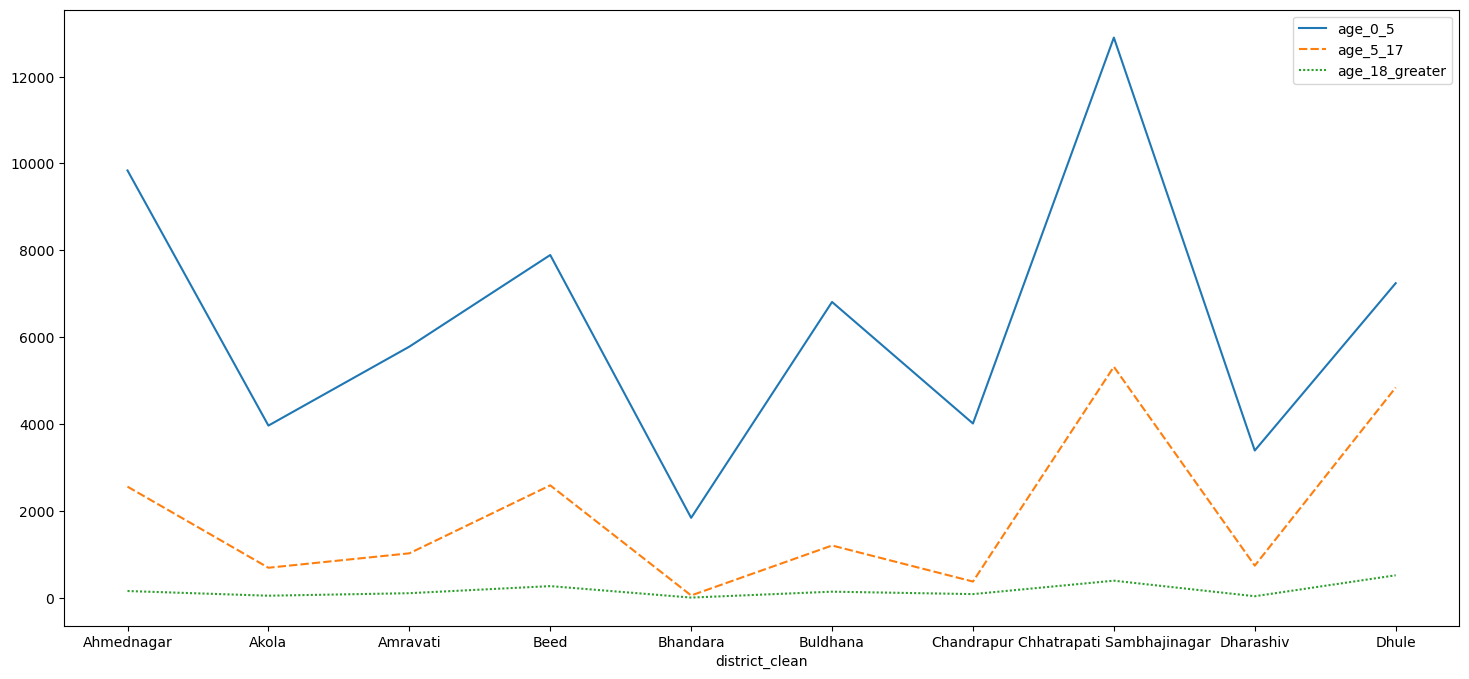

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))   # width, height in inches
sns.lineplot(data=df_maharashtra_dist_level1[['age_0_5','age_5_17','age_18_greater']])
plt.show()

In [66]:
df_maharashtra_pincode_level=df_maharashtra_cleaned.groupby('pincode')[['age_0_5','age_5_17','age_18_greater','total_enroll']].sum()
df_maharashtra_pincode_level.shape

(1580, 4)

In [67]:
df_maharashtra_pincode_level.sort_values('total_enroll', ascending=False).reset_index()
# df_maharashtra_pincode_level.to_excel("df_bihar_pincode_level.xlsx") 

,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
0,431001,5939,2956,209,9104
1,421302,5138,2538,120,7796
2,423203,3690,2291,77,6058
3,400612,3166,2179,101,5446
4,400043,2328,1456,53,3837
...,...,...,...,...,...
1575,400085,1,0,0,1
1576,431736,0,0,1,1
1577,400035,1,0,0,1
1578,425121,0,1,0,1


In [68]:
df_maharashtra_pincode_level.sort_values('total_enroll', ascending=False).reset_index().head(20)

,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
0,431001,5939,2956,209,9104
1,421302,5138,2538,120,7796
2,423203,3690,2291,77,6058
3,400612,3166,2179,101,5446
4,400043,2328,1456,53,3837
5,401107,2188,1530,89,3807
6,431122,2744,870,136,3750
7,421301,2390,882,39,3311
8,410206,2348,719,59,3126
9,425001,2200,474,105,2779


In [69]:
df_maharashtra_pincode_level.sort_values('total_enroll', ascending=False).reset_index().tail(20)

,pincode,age_0_5,age_5_17,age_18_greater,total_enroll
1560,415805,2,2,0,4
1561,400090,3,1,0,4
1562,400032,3,0,0,3
1563,416515,3,0,0,3
1564,416527,3,0,0,3
1565,421304,2,1,0,3
1566,416615,3,0,0,3
1567,416626,2,1,0,3
1568,416011,3,0,0,3
1569,440029,3,0,0,3


In [70]:
df_maharashtra_pincode_level

,age_0_5,age_5_17,age_18_greater,total_enroll
pincode,,,,
400001,44,14,6,64
400002,95,21,7,123
400003,165,18,6,189
400004,180,29,4,213
400005,143,32,7,182
...,...,...,...,...
445307,28,2,0,30
445308,31,6,1,38
445323,68,23,0,91


In [71]:
df_maharashtra_pincode_level1=df_maharashtra_pincode_level.head(10)

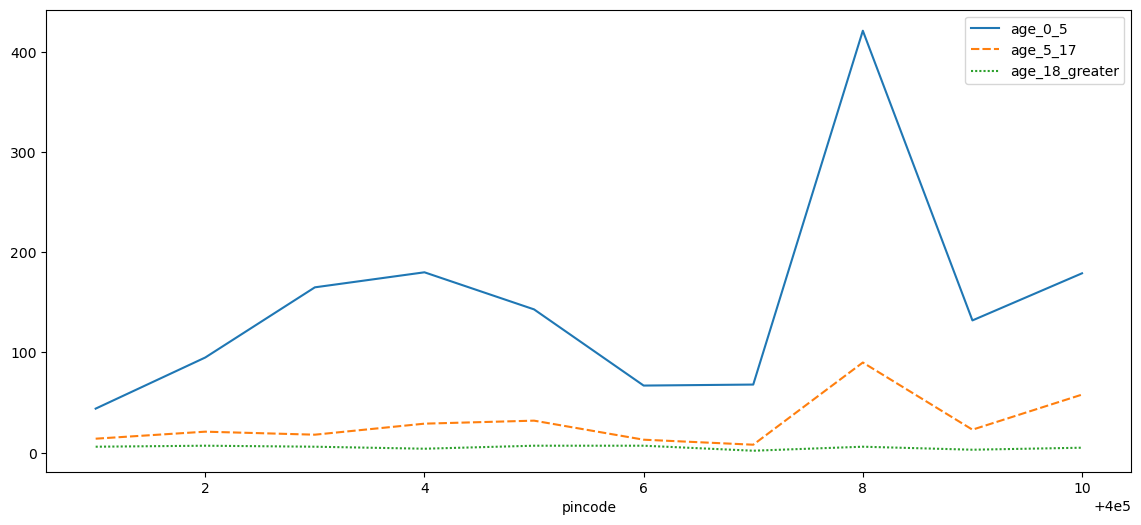

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))   # width, height in inches
sns.lineplot(data=df_maharashtra_pincode_level1[['age_0_5','age_5_17','age_18_greater']])
plt.show()

In [73]:
maharashtra_month_enroll_trend=df_maharashtra_cleaned.groupby('month')[['age_0_5','age_5_17','age_18_greater','total_enroll']].sum()
maharashtra_month_enroll_trend

,age_0_5,age_5_17,age_18_greater,total_enroll
month,,,,
03,232,130,98,460
04,7986,1901,704,10591
05,6706,2352,791,9849
06,6521,3518,610,10649
07,34468,18536,1763,54767
09,73837,27751,753,102341
10,41040,9032,933,51005
11,58064,12039,1783,71886
12,49960,6857,774,57591


In [74]:
maharashtra_month_enroll_trend.to_excel("df_maharashtra_month_level.xlsx") 

<Axes: xlabel='month'>

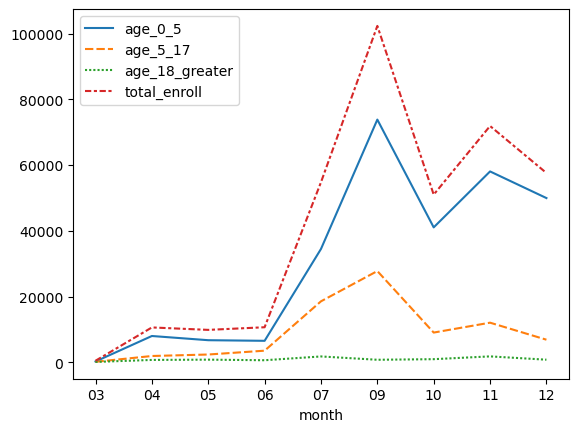

In [75]:
sns.lineplot(data=maharashtra_month_enroll_trend)